In [1]:
import numpy as np
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt

def load_model_and_image():
    """Load a pre-trained ViT model and a sample image."""
    # Load the model
    processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

    # Load a sample image
    url = "http://images.cocodataset.org/val2017/000000039769.jpg"
    raw_image = Image.open(requests.get(url, stream=True).raw)
    image = torch.tensor(np.array(raw_image)).permute(2, 0, 1)

    return processor, model, image

load_model_and_image()


/opt/homebrew/Caskroom/miniconda/base/envs/aisb/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/aisb/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(ViTImageProcessor {
   "do_convert_rgb": null,
   "do_normalize": true,
   "do_rescale": true,
   "do_resize": true,
   "image_mean": [
     0.5,
     0.5,
     0.5
   ],
   "image_processor_type": "ViTImageProcessor",
   "image_std": [
     0.5,
     0.5,
     0.5
   ],
   "resample": 2,
   "rescale_factor": 0.00392156862745098,
   "size": {
     "height": 224,
     "width": 224
   }
 },
 ViTForImageClassification(
   (vit): ViTModel(
     (embeddings): ViTEmbeddings(
       (patch_embeddings): ViTPatchEmbeddings(
         (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
       )
       (dropout): Dropout(p=0.0, inplace=False)
     )
     (encoder): ViTEncoder(
       (layer): ModuleList(
         (0-11): 12 x ViTLayer(
           (attention): ViTAttention(
             (attention): ViTSelfAttention(
               (query): Linear(in_features=768, out_features=768, bias=True)
               (key): Linear(in_features=768, out_features=768, bias=True)
               

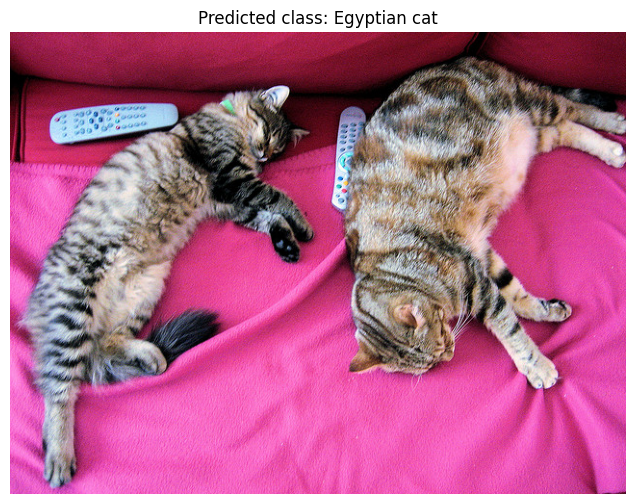

In [2]:
def classify_image(processor, model, image):
    """
    Classify an image using the ViT model.

    Args:
        processor: ViT image processor
        model: ViT classification model
        image: Image tensor in CHW format

    Returns:
        predicted_class_idx: Index of predicted class
        predicted_class_name: Name of predicted class
    """
    # TODO: Process the image and get model predictions
    # - Use processor to prepare inputs
    #   - The processor takes in the image and returns a tensor with normalized pixel values that the model was trained on
    #   - It also crops/resizes the image to the expected input size
    inputs = processor(images=image, return_tensors="pt")
    # - Run the model to get logits
    outputs = model(**inputs)
    # - Find and return the predicted class index and name
    logits = outputs.logits
    # returns index of max value: logits.argmax(-1)
    predicted_class_idx = logits.argmax(-1).item()

    return predicted_class_idx, model.config.id2label[predicted_class_idx]


processor, model, image = load_model_and_image()
class_idx, class_name = classify_image(processor, model, image)

plt.figure(figsize=(8, 6))
plt.imshow(image.numpy().transpose(1, 2, 0).astype("uint8"))
plt.title(f"Predicted class: {class_name}")
plt.axis("off")
plt.show()

# Noise

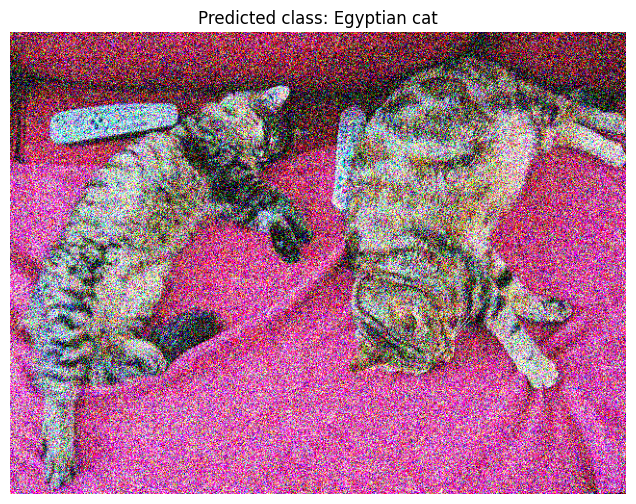

In [3]:
processor, model, image = load_model_and_image()

noise = torch.randn_like(image, dtype=torch.float32) * 100
attack = torch.clip(image + noise.int(), 0, 255)

class_idx, class_name = classify_image(processor, model, attack)

plt.figure(figsize=(8, 6))
plt.imshow(attack.numpy().transpose(1, 2, 0).astype("uint8"))
plt.title(f"Predicted class: {class_name}")
plt.axis("off")
plt.show()

In [4]:

def create_adversarial_perturbation(processor, model, image, target_class_id, steps=10, lr=0.1):
    """
    Create an adversarial perturbation to make the model classify the image as target_class.

    Args:
        processor: ViT image processor
        model: ViT classification model
        image: Original image tensor
        target_class_id: Target class index
        steps: Number of optimization steps
        lr: Learning rate

    Returns:
        perturbation: The adversarial perturbation
        perturbed_image: The adversarially perturbed image
        success: Whether the attack succeeded (the target class was predicted)
    """
    # TODO: Implement adversarial perturbation generation
    # - Initialize a random perturbation with requires_grad=True
    # - Use an optimizer to update the perturbation
    # - Minimize cross-entropy loss with target class
    pass

processor, model, image = load_model_and_image()
inputs = processor(images=attack, return_tensors="pt")
inputs = inputs['pixel_values']
inputs

tensor([[[[ 0.3333, -0.0980, -0.1216,  ..., -0.2549, -0.3412, -0.2157],
          [ 0.2235,  0.1216,  0.1373,  ..., -0.1843, -0.6157, -0.3333],
          [ 0.3255, -0.0353,  0.0431,  ..., -0.2157, -0.2392, -0.1451],
          ...,
          [ 0.7412,  0.3647,  0.4275,  ...,  0.6000,  0.0745,  0.5843],
          [ 0.9137,  0.8039,  0.6627,  ...,  0.3804,  0.2706,  0.3725],
          [ 0.9529,  0.8510,  0.4824,  ..., -0.0824, -0.0275,  0.1137]],

         [[-0.0667, -0.5608, -0.4275,  ..., -0.3490, -0.5059, -0.6235],
          [-0.1529, -0.6706, -0.4980,  ..., -0.6392, -0.6235, -0.6863],
          [-0.7098, -0.7804, -0.7020,  ..., -0.5137, -0.9059, -0.8980],
          ...,
          [-0.0980, -0.3804, -0.0431,  ..., -0.1765, -0.3882, -0.2941],
          [-0.4275, -0.4353, -0.1451,  ..., -0.4118, -0.3176, -0.1294],
          [-0.4039, -0.1765,  0.0667,  ..., -0.6706, -0.6392, -0.4824]],

         [[-0.5686, -0.3882, -0.3098,  ..., -0.4039, -0.3569, -0.4745],
          [-0.3569, -0.3725, -

In [13]:
import tqdm

processor, model, image = load_model_and_image()
inputs = processor(images=image, return_tensors="pt")
inputs = inputs['pixel_values']

# convert to dictionary for adam
perturbation = torch.randn_like(inputs, dtype=torch.float32)
perturbation = perturbation.requires_grad_(True)
optimizer = torch.optim.Adam([perturbation], lr=1e-3, weight_decay=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Test adversarial attack
target_class = 'daisy'
target_class_id = model.config.label2id[target_class]
y = torch.tensor([target_class_id])
for i in tqdm.tqdm(range(10000)):
    attack = torch.clip(inputs + perturbation, -1, 1)
    # - Run the model to get logits
    outputs = model(pixel_values=attack)

    loss = loss_fn(outputs.logits, y)

    # Get the predicted class ID from the logits
    current_pred_id = outputs.logits.argmax(-1).item()

    # Check if the prediction matches the target
    if current_pred_id == target_class_id:
        print(f"\n✅ Attack successful at step {i+1}! Target class '{target_class}' was predicted.")
        break # Exit the loop early

        # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()



  0%|          | 22/10000 [00:03<30:13,  5.50it/s]


✅ Attack successful at step 23! Target class 'daisy' was predicted.


In [ ]:


print(f"\nAttempting to change prediction to: {target_class}")
print("="*60)

perturbation, perturbed_image, success = create_adversarial_perturbation(
    processor, model, image, target_class_id, steps=10, lr=0.1
)

print(f"\nAttack {'succeeded' if success else 'failed'}!")